# Better Way to Convert Image to Grayscale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Plot Test Frames

(-0.5, 856.5, 480.5, -0.5)

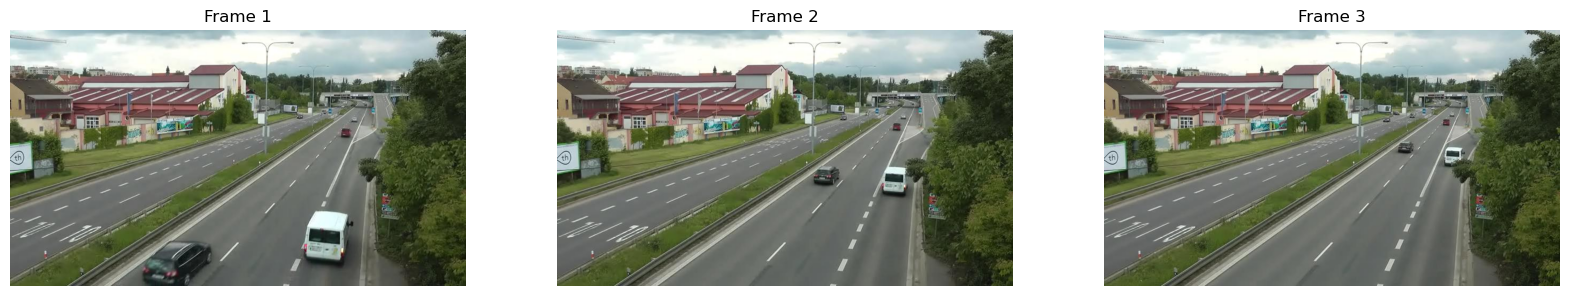

In [2]:
f_1 = plt.imread('../dataset/frames/train/00010/00010_2280.jpg')
f_2 = plt.imread('../dataset/frames/train/00010/00010_2320.jpg')
f_3 = plt.imread('../dataset/frames/train/00010/00010_2360.jpg')

plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.imshow(f_1)
plt.title('Frame 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(f_2)
plt.title('Frame 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(f_3)
plt.title('Frame 3')
plt.axis('off')

## Convert Image to Distance Gray

In [36]:
def distance(vec_1, vec_2):
    return np.sqrt(sum((v_1 - v_2) ** 2 for v_1, v_2 in zip(vec_1, vec_2)))


def img_to_distances_gray(img, base):
    d_1, d_2, d_3 = img.shape
    img_distance_gray = np.array([
        distance(base, pixel)
        for pixel in img.reshape((d_1 * d_2, d_3))
    ]).reshape(d_1, d_2)
    img_distance_gray_norm = cv2.normalize(
        src=img_distance_gray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return img_distance_gray_norm

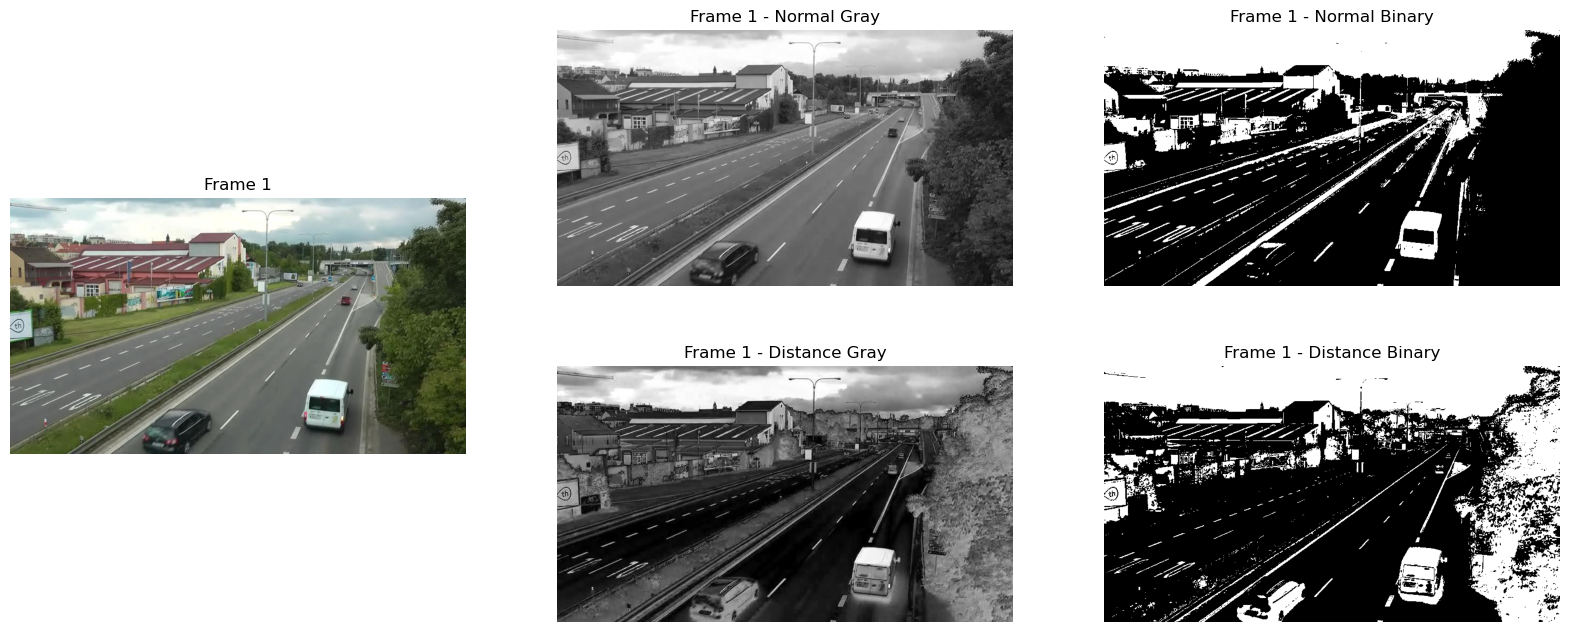

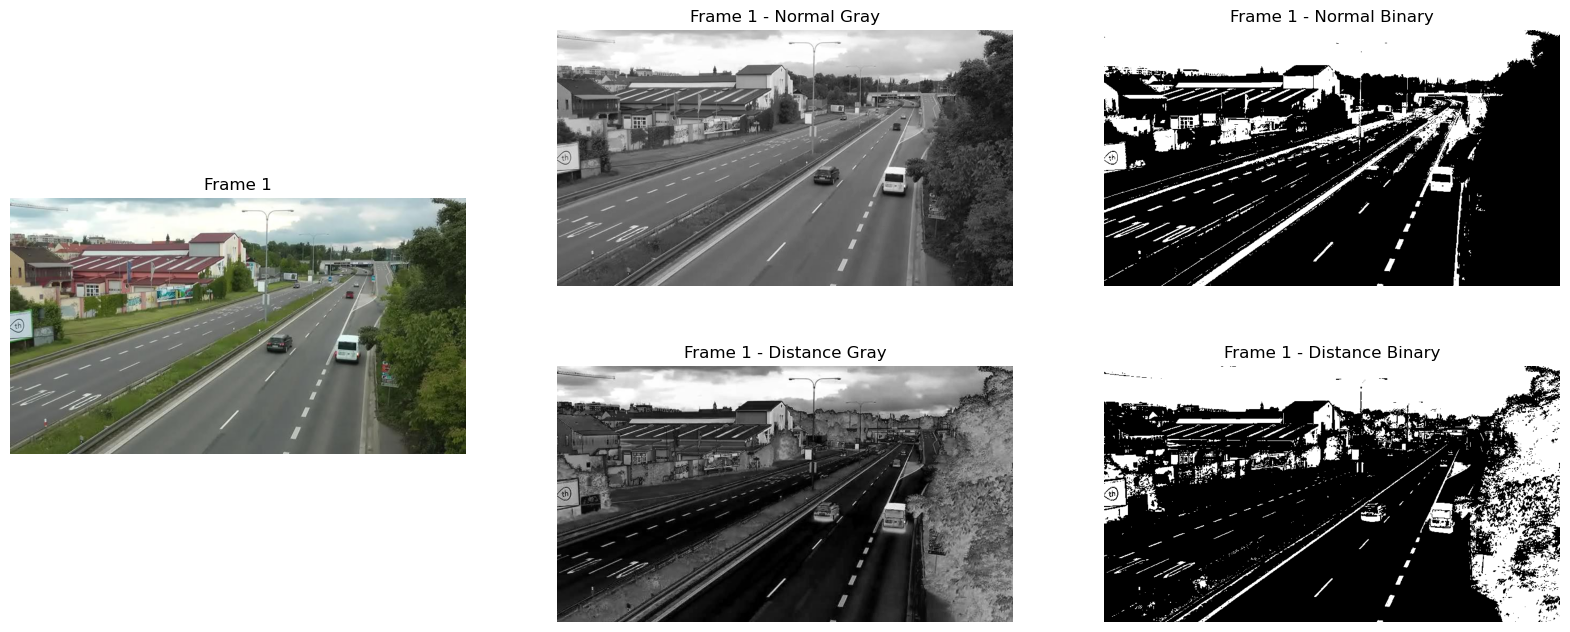

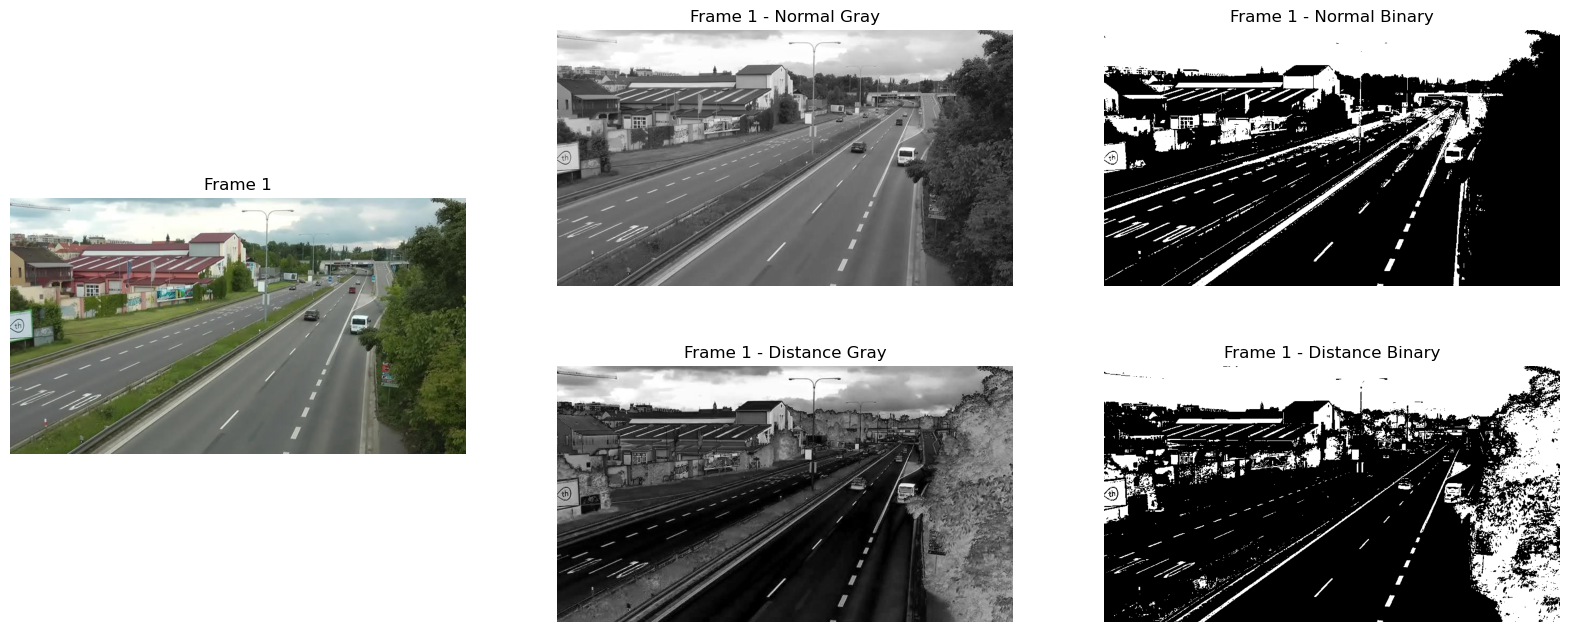

In [39]:
base_color = (110, 114, 109) # street color

for img in (f_1, f_2, f_3):
    img_norm_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_norm_bin = cv2.threshold(img_norm_gray, 127, 255, cv2.THRESH_BINARY)[1]
    img_distance_gray = img_to_distances_gray(img, base_color)
    img_distance_bin = cv2.threshold(img_distance_gray, 100, 255, cv2.THRESH_BINARY)[1]

    plt.figure(figsize=(20, 8))

    plt.subplot(2, 3, (1, 4))
    plt.imshow(img)
    plt.title('Frame 1')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(img_norm_gray, cmap='gray')
    plt.title('Frame 1 - Normal Gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(img_norm_bin, cmap='gray')
    plt.title('Frame 1 - Normal Binary')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(img_distance_gray, cmap='gray')
    plt.title('Frame 1 - Distance Gray')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(img_distance_bin, cmap='gray')
    plt.title('Frame 1 - Distance Binary')
    plt.axis('off')
    
    plt.show()